# Topic Modeling Descriptions

In [107]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

## Load Cleaned Data

In [12]:
hikes_df = pickle.load(open('../src/cleaned_hike_desc.pickle', 'rb'))
hikes_df.set_index('hike_id', inplace=True)

reviews = pickle.load(open('../src/cleaned_reviews.pickle', 'rb'))

In [11]:
reviews.set_index(['hike_id', 'user_id'], inplace=True)
reviews.head()

user_desc  \
hike_id user_id                                                               
hike_1  steph-scott-2     Beautiful in fall. Went on a Tuesday late morn...   
        diana-pinho-3     went on a Tuesday AM around 9ish and didn't ex...   
        jason-pennacchio  Hiked Oct 2020, hiked from parking lot #3. Arr...   
        lolita-dickson    We started with the blue trail and finished wi...   
        allie-jay-1       Definitely start with the red trail , it’s ste...   

                                                            cleaned_reviews  
hike_id user_id                                                              
hike_1  steph-scott-2     beautiful fall go tuesday late morning midfall...  
        diana-pinho-3     go tuesday around ish do not expect see many p...  
        jason-pennacchio  hiked oct hike parking lot arrive lot full ext...  
        lolita-dickson    start blue trail finish red one slippery today...  
        allie-jay-1       definitely start red trail steep difficult get...

## Feature Extraction

Set up Document Term Matrix with CountVectorizer

In [31]:
vectorizer = TfidfVectorizer(max_features=2000, max_df=0.7, min_df=10, ngram_range=(1,2))
hikes_dtm = vectorizer.fit_transform(hikes_df['cleaned_descriptions'])

In [67]:
bool(None)

False

## NMF

In [52]:
nmf_model = NMF(n_components=10, random_state=None)
nmf_model.fit(hikes_dtm)

NMF(n_components=10)

## Display Topics for NMF

In [39]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [53]:
display_topics(model=nmf_model, feature_names=vectorizer.get_feature_names(), no_top_words=10)


Topic  0
activity option, number activity, offer number, activity, number, option, trail offer, offer, loop, loop trail

Topic  1
loop, run, loop trail, hiking, use hiking, loop mile, primarily use, primarily, trail primarily, nature

Topic  2
well use, well, october dog, october, march, use march, trail must, must kept, kept leash, must

Topic  3
wild, flower, wild flower, beautiful wild, feature beautiful, beautiful, flower rate, flower good, feature, colorado feature

Topic  4
great forest, feature great, forest set, set, great, forest, set rate, set good, feature, set trail

Topic  5
accessible, accessible yearround, yearround, yearround dog, option accessible, trail must, kept leash, kept, must, leash

Topic  6
wildlife, see wildlife, chance see, chance, offer chance, see, wildlife rate, offer, wildlife good, lightly traffic

Topic  7
back trail, back, traffic back, waterfall, feature waterfall, difficult, rate difficult, difficult trail, waterfall rate, hiking

Topic  8
bird, tr

Topic 0

### Set topics back to dataframe


In [37]:
topic_results = nmf_model.transform(hikes_dtm)
hikes_df['NMF_Topic'] = topic_results.argmax(axis=1)

In [63]:
pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])], index=hikes_df.index)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
hike_id,,,,,,,,,,
hike_1123,0.000000,0.001292,0.072501,0.000000,0.000663,0.008160,0.001042,0.025294,0.082802,0.000000
hike_4,0.003821,0.044264,0.072333,0.000000,0.000000,0.006508,0.000000,0.035544,0.000000,0.000000
hike_6,0.000000,0.029806,0.025161,0.000754,0.001508,0.085085,0.001327,0.040574,0.001184,0.004807
hike_7,0.002350,0.050751,0.063478,0.000000,0.000000,0.013884,0.000000,0.003123,0.000000,0.000636
hike_8,0.000000,0.080795,0.057961,0.000000,0.000000,0.000000,0.000000,0.005755,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
hike_20791,0.043127,0.007208,0.000000,0.000000,0.010198,0.032114,0.000195,0.000000,0.000000,0.069162
hike_20792,0.008467,0.031273,0.000000,0.000000,0.122491,0.000000,0.000000,0.000000,0.008032,0.051883
hike_20793,0.046155,0.000000,0.049004,0.000000,0.000000,0.002149,0.000000,0.014789,0.000000,0.073667


In [106]:
hikes_df.sample(5)

,trail_description,cleaned_descriptions,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
hike_id,,,,,,,,,,,,,
hike_6340,Quaker Hill to McKeldin via Thru Trail (White)...,quaker hill mckeldin via thru trail white mile...,5,0.033419,0.000000,0.000962,0.001871,0.004416,0.078321,0.006440,0.027880,0.000000,0.006818
hike_20350,Siebenthaler Fen Boardwalk is a 1 mile loop tr...,siebenthaler fen boardwalk mile loop trail loc...,8,0.001605,0.008515,0.000000,0.000000,0.000000,0.000000,0.003604,0.000000,0.065348,0.035270
hike_7868,"Hemlock, Camp, Pitch Pine Trails Loop is a 4 m...",hemlock camp pitch pine trails loop mile moder...,5,0.052373,0.009336,0.000000,0.000000,0.000000,0.068873,0.000000,0.002105,0.000000,0.054878
hike_4041,Dingmans Falls via Dingmans Creek Trail is a 1...,dingmans fall via dingmans creek trail mile he...,8,0.000000,0.000000,0.029032,0.000000,0.000000,0.000000,0.000000,0.056136,0.081631,0.042216
hike_11624,Washington Ditch Boardwalk Trail is a 9.3 mile...,washington ditch boardwalk trail mile lightly ...,5,0.043866,0.000000,0.000000,0.002716,0.001049,0.090199,0.004875,0.018095,0.000000,0.087647


In [105]:
hikes_df[hikes_df['NMF_Topic']==0].head(5)

,trail_description,cleaned_descriptions,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
hike_id,,,,,,,,,,,,,
hike_45,Lake Surprise Loop via W. R Tracy Drive is a 1...,lake surprise loop via w r tracy drive mile he...,0,0.047299,0.000000,0.042781,0.000000,0.000000,0.008464,0.000000,0.018075,0.006133,0.046795
hike_79,Palisades Long Path Loop is a 2.1 mile heavily...,palisade long path loop mile heavily traffic l...,0,0.041554,0.029793,0.021798,0.000000,0.000000,0.010273,0.000000,0.000000,0.000000,0.000601
hike_330,White and Blue Trail Loop is a 2.1 mile light...,white blue trail loop mile lightly traffic loo...,0,0.041824,0.041431,0.016771,0.001415,0.000604,0.005568,0.004646,0.000000,0.000000,0.009345
hike_116,Jefferson Lake and Sunset Branch Loop is a 4.4...,jefferson lake sunset branch loop mile lightly...,0,0.035267,0.035018,0.023301,0.000001,0.000000,0.000000,0.003157,0.000000,0.000000,0.009202
hike_138,High Mountain Lookout Point and Waterfall Loop...,high mountain lookout point waterfall loop mil...,0,0.042055,0.017604,0.022305,0.000000,0.005228,0.026187,0.008355,0.007811,0.000000,0.000000


### PCA for Visualization


In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

In [77]:
X = pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])], index=hikes_df.index)
y = topic_results.argmax(axis=1)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)

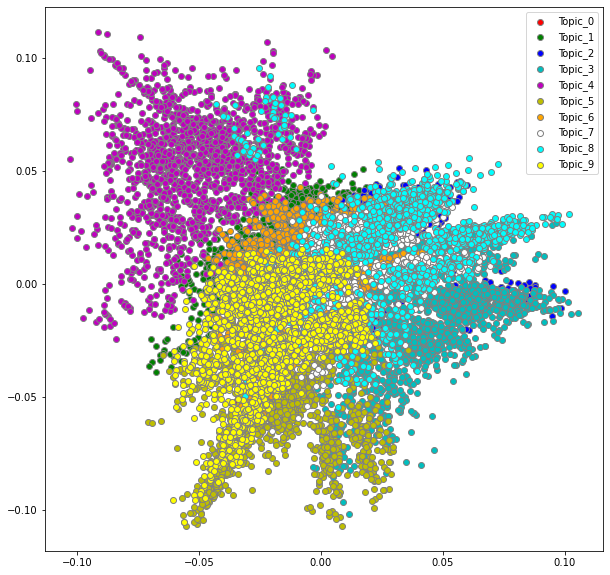

In [80]:
plot_PCA_2D(pca_features, y, ['Topic_'+str(x) for x in range(topic_results.shape[1])])

## KMeans Clustering of Topics from NMF.

In [96]:

from sklearn.cluster import KMeans

inertias = []

for k_ in np.arange(1, 20):
    km = KMeans(n_clusters=k_)
    km.fit(X)
    inertias.append(km.inertia_)


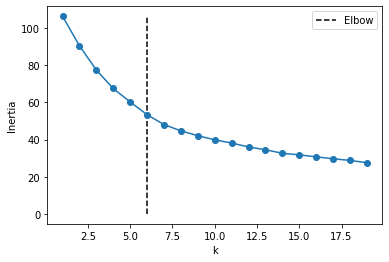

In [100]:
plt.plot(np.arange(1, 20), inertias, marker='o')
plt.vlines(x=6, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
plt.ylabel("Inertia")
plt.xlabel('k')
plt.legend();

No real Elbow Shown. 

In [46]:
# LDA 
vectorizer = TfidfVectorizer(max_features=2000, max_df=0.7, min_df=10, ngram_range=(1,2))
hikes_dtm = vectorizer.fit_transform(hikes_df['cleaned_descriptions'])

lda_hikes = LatentDirichletAllocation(n_components=10)
lda_hikes.fit(hikes_dtm)

LatentDirichletAllocation()

In [47]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_hikes, hikes_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.017084  0.167364       1        1  17.300977
6      0.032431 -0.102794       2        1  14.022640
2     -0.132246  0.000609       3        1  13.391937
0     -0.127094 -0.046890       4        1  12.101399
1      0.142952  0.107525       5        1  11.876531
7      0.075113  0.031287       6        1   9.237093
8      0.084782 -0.187192       7        1   8.270088
4      0.049477 -0.067643       8        1   5.391968
5     -0.204982  0.025315       9        1   4.226009
9      0.096650  0.072420      10        1   4.181358, topic_info=                      Term        Freq       Total Category  logprob  loglift
607           great forest  255.000000  255.000000  Default  30.0000  30.0000
492          feature great  255.000000  255.000000  Default  29.0000  29.0000
1623                   set  254.000000  254.000000  Default  28.0000  28.0000
531             forest set  254.000000  254.000000  Default  27.0000  27.0000
605                  great  269.000000  269.000000  Default  26.0000  26.0000
...                    ...         ...         ...      ...      ...      ...
974             moderately   18.827555  575.848630  Topic10  -5.2601  -0.2460
953        mile moderately   18.827555  575.848630  Topic10  -5.2601  -0.2460
3     accessible yearround   18.388934  469.014468  Topic10  -5.2837  -0.0644
1986             yearround   18.388934  469.014468  Topic10  -5.2837  -0.0644
2               accessible   18.360590  469.515839  Topic10  -5.2852  -0.0670

[742 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2         1  0.093714     accessible
2         2  0.085194     accessible
2         3  0.021299     accessible
2         4  0.012779     accessible
2         5  0.370595     accessible
...     ...       ...            ...
1996      4  0.585332  york features
1996      5  0.015820  york features
1997      1  0.029944     york offer
1997      4  0.748589     york offer
1997      5  0.179661     york offer

[1761 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 3, 1, 2, 8, 9, 5, 6, 10])

* Topic 1, 5: descriptions offer multiple ammenities at location.  Suggests Multi-use trail or park with camping, hiking, biking etc
* Topic 2: Descriptions discuss Loop- trails. Trails that start and end at the same spot
* Topic 3, 4: Descriptions offer views of wildlife and Birdwatching
* Topic 6: Descriptions offer views of wildflowers
* Topic 7: Descriptions focus on Forest environment. Suggests thick forest, brush.
* Topic 8: Not Much (New Jersey?) Consider Dropping
* Topic 9: Descriptions focus on Views and Scenic Hikes.  Suggests high points, large vistas/overlooks
* Topic 10: Horseback Riding Allowed?

---

# Topic Modeling Reviews

In [101]:
reviews = pickle.load(open('../src/cleaned_reviews.pickle', 'rb'))

In [103]:
reviews.head(5)

,hike_id,user_id,user_desc,cleaned_reviews
0,hike_1,steph-scott-2,Beautiful in fall. Went on a Tuesday late morn...,beautiful fall go tuesday late morning midfall...
2,hike_1,diana-pinho-3,went on a Tuesday AM around 9ish and didn't ex...,go tuesday around ish do not expect see many p...
3,hike_1,jason-pennacchio,"Hiked Oct 2020, hiked from parking lot #3. Arr...",hiked oct hike parking lot arrive lot full ext...
4,hike_1,lolita-dickson,We started with the blue trail and finished wi...,start blue trail finish red one slippery today...
5,hike_1,allie-jay-1,"Definitely start with the red trail , it’s ste...",definitely start red trail steep difficult get...


In [110]:
stopwords = ['hike', 'trail']
vectorizer = TfidfVectorizer(max_features=2000, max_df=0.7, min_df=10, ngram_range=(1,2), stop_words=stopwords)
r_dtm = vectorizer.fit_transform(reviews['cleaned_reviews'])

## NMF

In [111]:
nmf_model = NMF(n_components=10, random_state=None)
nmf_model.fit(r_dtm)

display_topics(model=nmf_model, feature_names=vectorizer.get_feature_names(), no_top_words=10)


Topic  0
not, go, get, lot, pron, mile, back, way, take, do

Topic  1
great, great view, kid, family, great little, great place, little, dog, day, great day

Topic  2
beautiful, beautiful view, fall, waterfall, lake, beautiful fall, beautiful scenery, beautiful day, scenery, beautiful waterfall

Topic  3
nice, nice view, nice easy, walk, nice walk, little, nice little, really nice, really, nice short

Topic  4
view, top, amazing, view top, great view, worth, amazing view, beautiful view, steep, climb

Topic  5
easy, walk, nice easy, easy walk, pretty, fun, kid, easy follow, great easy, pretty easy

Topic  6
love, dog, kid, dog love, place, year, old, year old, kid love, love view

Topic  7
good, good view, workout, good workout, one good, one, pretty good, kid, family, dog

Topic  8
awesome, awesome view, day, waterfall, fall, view, little, place, cool, scenery

Topic  9
well, maintain, mark, well maintain, well mark, marked, well marked, well worth, worth, not well


## LDA

In [116]:
lda_reviews = LatentDirichletAllocation(n_components=5)
lda_reviews.fit(r_dtm)

KeyboardInterrupt: 

In [ ]:
pyLDAvis.sklearn.prepare(lda_reviews, r_dtm, vectorizer)

In [115]:
reviews

,hike_id,user_id,user_desc,cleaned_reviews
0,hike_1,steph-scott-2,Beautiful in fall. Went on a Tuesday late morn...,beautiful fall go tuesday late morning midfall...
2,hike_1,diana-pinho-3,went on a Tuesday AM around 9ish and didn't ex...,go tuesday around ish do not expect see many p...
3,hike_1,jason-pennacchio,"Hiked Oct 2020, hiked from parking lot #3. Arr...",hiked oct hike parking lot arrive lot full ext...
4,hike_1,lolita-dickson,We started with the blue trail and finished wi...,start blue trail finish red one slippery today...
5,hike_1,allie-jay-1,"Definitely start with the red trail , it’s ste...",definitely start red trail steep difficult get...
...,...,...,...,...
1751446,hike_19050,rharrison,Did this hike last labor day. Awesome hike 13...,hike last labor day awesome hike mile steady i...
1751447,hike_19050,thewarder500-1,There are many ways to get to the enchanted va...,many way get enchant valley far easy short way...
1751448,hike_19050,jchamp23,This hike is long and there is some elevation ...,hike long elevation gain supermellow shape eas...
1751449,hike_19050,thewoodsprite,Beautiful hike in the spring. The melting snow...,beautiful hike spring melt snow create dozen w...



Trail Reviews

In [6]:
stopwords = []
vectorizer = TfidfVectorizer(max_features=2000, min_df=10, max_df=0.4, ngram_range=(1,2))
reviews_dtm = vectorizer.fit_transform(reviews['cleaned_reviews'])

In [7]:
lsa = TruncatedSVD(5)
reviews_topics = lsa.fit_transform(reviews_dtm)
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
not, great, view, nice, beautiful, get, go, easy, lot, good

Topic  1
great, great trail, great hike, great view, view, trail great, hike great, beautiful view, beautiful, view top

Topic  2
nice, beautiful, easy, nice trail, beautiful view, walk, view, nice easy, easy trail, easy hike

Topic  3
beautiful, beautiful view, beautiful trail, beautiful hike, view, hike beautiful, worth, trail beautiful, amazing, love

Topic  4
view, top, amazing, view top, great view, good, worth, awesome, amazing view, steep


Add hikes and trail to stopwords

In [8]:
# Descriptions
nmf_model = NMF(10)
reviews_ = nmf_model.fit_transform(reviews_dtm)

In [9]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
lot, go, get, mile, back, way, take, lake, parking, road

Topic  1
great, great trail, great hike, great view, trail great, hike great, kid, dog, family, great place

Topic  2
nice, nice trail, nice hike, nice view, walk, nice walk, trail nice, nice easy, little, really nice

Topic  3
beautiful, beautiful view, beautiful trail, beautiful hike, trail beautiful, hike beautiful, fall, waterfall, beautiful scenery, scenery

Topic  4
view, top, amazing, view top, great view, awesome, worth, amazing view, beautiful view, steep

Topic  5
easy, easy hike, easy trail, walk, nice easy, easy walk, trail easy, pretty, kid, fun

Topic  6
well, maintain, mark, well maintain, well mark, trail well, marked, well marked, well worth, maintain trail

Topic  7
love, love trail, dog, love hike, place, kid, dog love, year, old, year old

Topic  8
good, good trail, good hike, good view, trail good, workout, good workout, hike good, kid, one good

Topic  9
not, do, be, do not, pron, be not, pron be,

* Topic 1: Multi Use Trail
* Topic 2: Moderate Rated Trails?
* Topic 3: Dog Friendly
* Topic 7: Difficult

# Trail Review
* Topic 0: Not much
* Topic 1, 2: Family Friendly
* Topic 3: Prioritizes Views
* Topic 4: Harder hikes with good payout
* Topic 5: Easy
* Topic 6: Well maintained
* Topic 7: Love Love Love
* Topic 8: Good / Moderate Emotion
* Topic 9: Not what the trail description highlights? / Negativity

In [153]:
nmf_topic_df = pd.DataFrame(reviews_.round(5), index=reviews.cleaned_reviews, columns=['Topic_'+str(i) for i in range(10)])

In [154]:
nmf_topic_df.reset_index(inplace=True)

# nmf_topic_df.sort_values(by='Topic_5', ascending=False).head(40)
nmf_topic_df['review_len'] = nmf_topic_df.cleaned_reviews.map(lambda x: len(x.split()))

In [166]:
mask = nmf_topic_df['review_len']>2
nmf_topic_df[mask].sort_values(by='Topic_9', ascending=False).head(20)

,cleaned_reviews,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,review_len
55682,alright not mtb,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
490062,not weak hearted,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
462125,not faint hearted,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
191856,not peen worthy,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
306933,not fan dull,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
375820,brown not colorful,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
428054,not bikeable trail,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
337972,progress not perfection,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
314787,not public trail,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
416221,not qualify trail walkway,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,4


In [151]:
import seaborn as sns

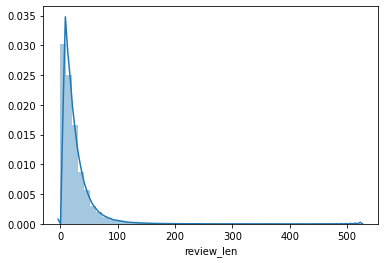

In [152]:
sns.distplot(nmf_topic_df['review_len'])

In [49]:
pd.DataFrame(lda_hikes.transform(hikes_dtm))

,0,1,2,3,4,5,6,7,8,9
0,0.369061,0.013288,0.524632,0.013290,0.013289,0.013288,0.013289,0.013288,0.013288,0.013289
1,0.725630,0.014530,0.014530,0.014531,0.158136,0.014528,0.014530,0.014528,0.014528,0.014528
2,0.014324,0.014322,0.014323,0.014323,0.871107,0.014320,0.014320,0.014321,0.014321,0.014320
3,0.532610,0.014643,0.014645,0.014645,0.350242,0.014642,0.014643,0.014644,0.014642,0.014643
4,0.468228,0.014404,0.014407,0.014407,0.160469,0.270465,0.014408,0.014404,0.014404,0.014405
...,...,...,...,...,...,...,...,...,...,...
14947,0.015708,0.469249,0.015708,0.015710,0.015710,0.015707,0.015713,0.331116,0.015767,0.089612
14948,0.017049,0.017051,0.017052,0.017051,0.017050,0.017049,0.435474,0.017051,0.428125,0.017049
14949,0.091448,0.014303,0.014297,0.794164,0.014297,0.014297,0.014299,0.014299,0.014297,0.014298
14950,0.013704,0.013702,0.013703,0.013704,0.013702,0.013701,0.876677,0.013703,0.013702,0.013702


In [ ]:
# Look at count of scores that are over a certain threshold to remove nonsense words

In [108]:
vectorizer = CountVectorizer(max_features=2000,  min_df=10, ngram_range=(1,2))
reviews_dtm = vectorizer.fit_transform(reviews['cleaned_reviews'])

'3.8.3 (default, Jul  2 2020, 11:26:31) \n[Clang 10.0.0 ]'